Engy-4350: Nuclear Reactor Engineering Spring 2019 UMass Lowell; Prof. V. F. de Almeida **03Feb2019**

# 02a. Nuclear Data and Data Processing: Prompt Fission Product Yields 
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\abs}[1]{\left\lvert{#1}\right\rvert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents
* [Objectives](#obj)
* [Introduction](#intro)
* [Independent fission fragment yield (A)](#iffya)
* [Independent fission fragment yield (A,Z)](#iffyaz)
---

## Objectives<a id="obj"></a>
+ Demonstrate how to obtain traceable fission product nuclear data and have them available through the notebook for analysis and problem solving.
+ Demonstrate how to obtain average values for various quantities related to fission products yield.

## Introduction<a id="intro"></a>

Refer to Notebook 02.

## Independent fission fragment yield (A)<a id="iffya"></a>

Acquiring the data:

+ Using the [ENDF](https://www.nndc.bnl.gov/exfor/endf00.jsp) help tab, look for an existing example. In this case follow the `Example 9: 235U, individual and cumulative fission product yields, US library, numerical values`. 
+ Use the *extended retrieval tab* and provide the input: `Target=u-235, Sub-library (Projectile) = *fpy* and Library=ENDF/B-VII.0`. 
+ In the new window, select the library and click on `FPY(A)`. 
+ Select the *independent* (prompt) thermal neutron fission product yield data `FPYI,U-235,ENDF/B-VIII.0,Ei=0.0253eV` and `Repaint` the plot.
+ Click on `See: plotted data`.
+ Use the browser save option to create a file with the raw data: `u-235-ifpy-A-thermal.dat`.

**Note:** 

    The independent yields mean expected numbers of each produced nuclide at the moment that fission is occured. The total expected number is just 2 if fission was only 2-body fission, however, the number is a bit larger than 2 because actual fission yield data has included light nuclides produced by 3-body fission.  

In [1]:
'''View the raw data'''

!head -n 13 data/u-235-ifpy-A-thermal.dat
print('...')
!tail -n 3 data/u-235-ifpy-A-thermal.dat

#ZVView-data-copy:   4-Feb-2019 09:37:32
#=======================================
#
#name:   FPYI,U-235,ENDF/B-VIII.0,Ei=0.0253eV
#X.axis: A
#Y.axis: Fission Product Yield
#wdata:  3
#ldata:  107
#data...
#            X            Y         +-dY
#       NO-DIM       PC/FIS       PC/FIS
            66  7.22115e-10  4.62154e-10
            67   3.60581e-9   2.30772e-9
...
           170  5.00653e-11  3.20418e-11
           171  2.34703e-11   1.5021e-11
           172  7.68675e-12  4.91952e-12


Importing tabular data using [Pandas documentation](https://pandas.pydata.org/) and visualizing the data using [Matplotlib](https://matplotlib.org/). Also consult [ChEn-3170](https://github.com/dpploy/chen-3170).

In [2]:
'''Function to read the blank-spaced column data into a Pandas data frame (table)'''

def read_table(filename):
    '''
    Read table data into a `pandas` data frame (table).  
    
    Parameters
    ----------
    file_name: str, required
        File name and its path relative to this notebook.
    
    Returns
    -------
    df: pandas.df
        `Pandas` data frame (table) with Independent FP yield in percentage.

    Examples
    --------
    '''
    
    import pandas as pd

    # build a "data frame (i.e. table)"
    df = pd.read_csv( filename, 
                      names=['A','FP Yield','Uncertainty'], 
                      skiprows=11,
                      delim_whitespace=True)
    
    print('Sum of yield values in data file = ',round(sum(df['FP Yield']),2))
    
    # Convert normalized "mass fraction" yield to percentage
    # This is equivalent to set the independent FP yield to the number of 
    # fragments obtained after 100 fissions occur; a total of ~200 fragments.
    df['FP Yield']    *= 100.0
    df['Uncertainty'] *= 100.0

    return df

In [3]:
'''Import data into a Pandas data frame (table)'''

ifpy_df = read_table('data/u-235-ifpy-A-thermal.dat')
print('Sum of yield values in data frame = ',round(sum(ifpy_df['FP Yield']),2))

Sum of yield values in data file =  2.0
Sum of yield values in data frame =  200.0


In [4]:
'''Plot function for nuclides fission products'''

def plot_fp_yield( df ):
    '''
    Read table data into a `pandas` data frame (table).  
    
    Parameters
    ----------
    file_name: str, required
        File name and its path relative to this notebook.
    
    Returns
    -------
    df: pandas.df
        `Pandas` data frame (table).

    Examples
    --------
    '''

    import matplotlib.pyplot as plt
    plt.figure(1, figsize=(8, 6))
 
    plt.errorbar(df['A'], df['FP Yield'], yerr=df['Uncertainty'],
                 fmt='ok',ecolor='r',label='experimental (ENDF/B-VIII.0)',capsize=3)
    
    plt.xlabel(r'A',fontsize=18)
    plt.ylabel(r'Prompt Fission Product Yield [%]',fontsize=18)
    plt.title(r'Asymmetrical Fission of $^{235}_{92}$U (E=0.0253 eV)',fontsize=20)
    plt.legend(loc='best',fontsize=12)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    #plt.yscale('log') # uncomment to plot y in log scale
    
    plt.grid(True)
    plt.show()
    print('')

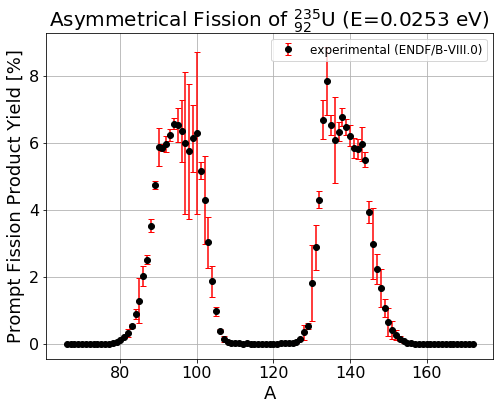

In [6]:
'''Plot imported data'''

plot_fp_yield( ifpy_df )

We want an analytical function for the FP yield as a function of the mass number:

\begin{equation*}
y(A)
\end{equation*}

that fits the experimental data.

### Generalized least-squares fitting with Fourier basis functions<a id="intro"></a>

The least-squares method with Fourier basis functions is a powerful computational tool for data fitting and data analysis, the course notes OneNote [ChEn-3170-gen-lsq](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/Ep9qLSMssi1MjWvl2wYlTHkBSd5aUUoo1fIoe5pswIV0vA?e=Mhkd6f) collects elements of the theory (see also  [ChEn-3170](https://github.com/dpploy/chen-3170) Notebook 12). 

The Fourier expansion for approximating the fission yield $y(A)$ is

\begin{equation*}
y(A) = \sum\limits_{k=0}^N \alpha_k\,\cos(k\,\mu\,A) + \beta_k\,\sin(k\,\mu\,A)
\end{equation*}

If we have a set of values of the independent variable $A_i, i=1,\ldots,m$, the above Fourier expression when applied to every $A_i$ gives

\begin{equation*}
\bvec = \Amtrx\,\xvec 
\end{equation*}

where $\Amtrx =  \begin{pmatrix}
1 & \cos(\mu\,A_1) & \sin(\mu\,A_1) & \cos(2\mu\,A_1) & \sin(2\mu\,A_1) & \ldots & \cos(N\mu\,A_1) & \sin(N\mu\,A_1)  \\
1 & \cos(\mu\,A_2) & \sin(\mu\,A_2) & \cos(2\mu\,A_2) & \sin(2\mu\,A_2) & \ldots & \cos(N\mu\,A_2) & \sin(N\mu\,A_2)  \\
\vdots  & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
1 & \cos(\mu\,A_m) & \sin(\mu\,A_m) & \cos(2\mu\,A_m) & \sin(2\mu\,A_m) & \ldots & \cos(N\mu\,A_m) & \sin(N\mu\,A_m)  \\
 \end{pmatrix}$, 
 $\xvec =  \begin{pmatrix}
  \alpha_0 \\ 
  \alpha_1 \\
  \beta_1 \\
  \vdots \\
  \alpha_N \\
  \beta_N \\ 
 \end{pmatrix}$, 
and 
$\bvec = \begin{pmatrix}
 y_1 \\ 
 y_2 \\ 
 \vdots  \\ 
 y_m \\ 
\end{pmatrix} $.

In [7]:
import math
import numpy as np # Numpy is the numerical array package for Python

period = np.max(ifpy_df['A']) - np.min(ifpy_df['A'])  # [A]
omega  = 1/period                           # cycle frequency [1/A]
mu     = 2*math.pi * omega                  # radian frequency [rad/A]

n_pairs = 9

In [8]:
def build_fourier_matrix( mu, n_pairs, abscissa_vec ):

    import numpy as np
    assert isinstance(n_pairs,int)
    assert isinstance(abscissa_vec,np.ndarray)
        
    a_mtrx = np.ones((abscissa_vec.size, 2*n_pairs + 1))

    for k in range(n_pairs+1):
        if k == 0:
            continue
        a_mtrx[:,2*k-1] = np.cos(k * mu * abscissa_vec)
        a_mtrx[:,2*k]   = np.sin(k * mu * abscissa_vec)

    return a_mtrx            

In [9]:
a_mtrx = build_fourier_matrix( mu, n_pairs, np.array(ifpy_df['A']) )

b_vec = np.array(ifpy_df['FP Yield'])

rank = np.linalg.matrix_rank(a_mtrx)
#print('rank(A) =',rank)
assert rank == 2*n_pairs+1

Build the Least-Squares normal equations and solve for the optimal coefficients of the fitting

\begin{equation*}
\Amtrx^\top\Amtrx\,\xvec_\text{LS}  = \Amtrx^\top\,\bvec .
\end{equation*}

The least squares solution $\xvec_\text{LS}$ gives the optimal values of the Fourier modes, $\alpha_k\,\cos(k\,\mu\,A)$ and $\beta_k\,\sin(k\,\mu\,A)$.

In [10]:
x_vec = np.linalg.solve( a_mtrx.transpose()@a_mtrx, a_mtrx.transpose()@b_vec )

We want an analytical function for the FP yield as a function of the mass number:

\begin{equation*}
y(A)
\end{equation*}

that fits the experimental data.

In [11]:
def fp_yield( mass_number ):
    '''
    Fission product yields curve fitting.

    Parameters
    ----------
    mass_number: float or numpy.ndarray, required
        Nuclide mass number. If `mass_number` is an array, 
        the return value is also an array of values.
    x_a_0: float, required
        Mole fraction of species A.
    
    Returns
    -------
    value: float or numpy.ndarray
        Value or vector of values of the fission product yield
        evaluated at `mass_number`.

    Examples
    --------
    '''
    #assert np.min(mass_number) >= min(df['A']) and np.max(mass_number) <= max(df['A']),\
    #   'Out of range. Min = %r, max = %r, request_min = %r, request_max = %r'%\
    #   (min(df['A']), max(df['A']), np.min(mass_number), np.max(mass_number) )
    
    if np.min(mass_number) < min(ifpy_df['A']) or np.max(mass_number) > max(ifpy_df['A']):
        return False
    
    a_mtrx = build_fourier_matrix(mu, n_pairs, mass_number )
    fp_yield = a_mtrx @ x_vec
    
    fp_yield[fp_yield<0] = 0.0 # correct for negative values in the curve fitting
        
    return fp_yield

In [12]:
'''Function: plot the LS Fourier fit and all modes'''

def plot_fourier_fit(mass_number_expt, fp_yield_expt, mu, x_vec, roots=None):
    
    import matplotlib.pyplot as plt
    
    plt.figure(2, figsize=(8,6))

    # plot experimental data
    plt.plot(mass_number_expt, fp_yield_expt,'r*',label='experimental (ENDF/B-VIII.0)')

    # plot LS Fourier fitting
    n_plot_pts = 100
    mass_number_plot = np.linspace(mass_number_expt[0],mass_number_expt[-1],n_plot_pts)
    fp_yield_plot = fp_yield(mass_number_plot)
    assert fp_yield_plot is not False
    
    plt.plot( mass_number_plot, fp_yield_plot,'b:',label='LS Fourier fitting' )

    # plot each of the Fourier modes
    a_mtrx = build_fourier_matrix(mu, n_pairs, mass_number_plot)
    from engy_4350.help import color_map
    colors = color_map(a_mtrx.shape[1])
    
    for j in range(a_mtrx.shape[1]):

        if j != 0:
            color=colors[j-1]
        
        if j == 0:
            color='black'
            k = 0
            label=r'$\alpha_{%i}$=%4.2e'%(k,x_vec[j])
            line_style = '-'  # cosine
        elif j%2 == 0:
            k = j/2
            label=r'$\beta_{%i}$(=%4.2e) sin($%i\mu t$)'%(k,x_vec[j],k)
            line_style = '--'  # cosine
        else:
            k = (j+1)/2
            label=r'$\alpha_{%i}$(=%4.2e) cos($%i\mu t$)'%(k,x_vec[j],k)
            line_style = '-'  # sine
        
        vertical_offset = 3 # to improve visibility of modes
        if j == 0:
            vertical_offset = 0
        
        plt.plot(mass_number_plot, x_vec[j]*a_mtrx[:,j]-vertical_offset,label=label,color=color,linestyle=line_style )
        
    plt.xlabel(r'A',fontsize=18)
    plt.ylabel(r'Prompt Fission Products Yield and Fit [%]',fontsize=18)
    plt.title('Fission of $^{235}_{92}$U (E=0.0253 eV)',fontsize=20)

    (x_min,x_max) = plt.xlim()
    dx = abs(x_max-x_min)
    x_text = x_min + dx*0.25
    
    (y_min,y_max) = plt.ylim()
    dy = abs(y_max-y_min)
    y_text = y_min + dy*0.02
    
    plt.text(x_text, y_text, 
             r'$\mu=$%8.2e [rad/A],   $N$=%i'%
             (mu,n_pairs),fontsize=16)

    if roots is not None:
        for r in roots:
            plt.plot(r, 0.0,'b*',markersize=16)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='upper right',bbox_to_anchor=(1.55, 1),fontsize=12)
    #plt.yscale('log')
    plt.grid(True)
    plt.show()
    print('')
    
    return

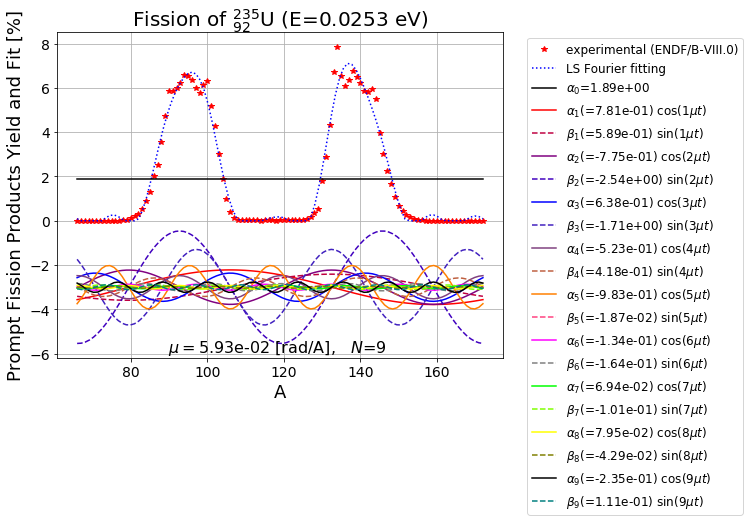

In [13]:
'''Plot the LS Fourier fit'''

plot_fourier_fit(np.array(ifpy_df['A']), np.array(ifpy_df['FP Yield']), mu, x_vec)

In [14]:
'''Usage of FP yield function'''

def example(function):
    np.set_printoptions(precision=5)
    # single value A
    print('y[80] = ',fp_yield(np.array([80])))

    # multiple values of A at once
    a_values = np.array([80,90,100,110,120,130,140,150,160],np.float64)
    y_values = fp_yield(a_values)

    for y in y_values:
        i = list(y_values).index(y)
        print('y[%2i] = %+5.3e'%(a_values[i],y))
        
example(fp_yield)

y[80] =  [0.]
y[80] = +0.000e+00
y[90] = +5.049e+00
y[100] = +5.412e+00
y[80] = +0.000e+00
y[120] = +1.307e-01
y[130] = +2.321e+00
y[140] = +6.423e+00
y[150] = +7.916e-01
y[160] = +2.030e-01


Build the derivative of the Fourier expansion

\begin{equation*}
y'(A) = \sum\limits_{k=0}^N -\alpha_k\,k\,\mu\,\sin(k\,\mu\,A) + \beta_k\,k\,\mu\,\cos(k\,\mu\,A)
\end{equation*}

In [15]:
def build_fourier_matrix_prime( mu, n_pairs, abscissa_vec ):

    import numpy as np
    a_mtrx = np.zeros((abscissa_vec.size, 2*n_pairs + 1))

    for k in range(n_pairs+1):
        if k == 0:
            continue
        a_mtrx[:,2*k-1] = - k*mu * np.sin(k * mu * abscissa_vec)
        a_mtrx[:,2*k]   =   k*mu * np.cos(k * mu * abscissa_vec)

    return a_mtrx  

In [16]:
def fp_yield_prime( mass_number ):
    '''
    Fission product yields curve fitting.

    Parameters
    ----------
    mass_number: float or numpy.ndarray, required
        Nuclide mass number. If `mass_number` is an array, 
        the return value is also an array of values.
    x_a_0: float, required
        Mole fraction of species A.
    
    Returns
    -------
    value: float or numpy.ndarray
        Value or vector of values of the fission product yield
        evaluated at `mass_number`.

    Examples
    --------
    '''
    #assert np.min(mass_number) >= min(df['A']) and np.max(mass_number) <= max(df['A']),\
    #    'Out of range. Min = %r, max = %r, request_min = %r, request_max = %r'%\
    #    (min(df['A']), max(df['A']), np.min(mass_number), np.max(mass_number) )
    
    if np.min(mass_number) < min(ifpy_df['A']) or np.max(mass_number) > max(ifpy_df['A']):
        return False
    
    a_mtrx = build_fourier_matrix_prime(mu, n_pairs, mass_number )
    fp_yield_prime = a_mtrx @ x_vec
        
    return fp_yield_prime

In [17]:
'''Usage of derivative of the FP yield function'''

def example(function):
    np.set_printoptions(precision=5)
    # single value A
    print("y'[80] = ",fp_yield_prime(np.array([80],np.float64)))

    # multiple values of A at once
    a_values = np.array([80,90,100,110,120,130,140,150,160],np.float64)
    y_prime_values = fp_yield_prime(a_values)

    for y in y_prime_values:
        i = list(y_prime_values).index(y)
        print("y'[%2i] = %+5.3e"%(a_values[i],y))
example(fp_yield_prime)

y'[80] =  [-0.0239]
y'[80] = -2.390e-02
y'[90] = +5.237e-01
y'[100] = -6.581e-01
y'[110] = -2.177e-02
y'[120] = -6.191e-02
y'[130] = +9.702e-01
y'[140] = -3.852e-01
y'[150] = -5.445e-01
y'[160] = -9.385e-02


In [18]:
'''Function: plot the derivative of the fp_yield function'''

def plot_fp_yield_prime(mass_number_expt, mu, x_vec):
    
    import matplotlib.pyplot as plt
    
    plt.figure(2, figsize=(8,6))

    # plot LS Fourier fitting
    n_plot_pts = 100
    mass_number_plot = np.linspace(mass_number_expt[0],mass_number_expt[-1],n_plot_pts)
    
    fp_yield_prime_plot = fp_yield_prime(mass_number_plot)
    assert fp_yield_prime_plot is not False
    
    plt.plot( mass_number_plot, fp_yield_prime_plot,'b:',label='FP Yield Derivative' )

    # plot all derivatives of the Fourier modes
    a_mtrx = build_fourier_matrix_prime(mu, n_pairs, mass_number_plot )
    from engy_4350.help import color_map
    colors = color_map(a_mtrx.shape[1])
    
    for j in range(a_mtrx.shape[1]):

        if j != 0:
            color=colors[j-1]
        
        if j == 0:
            color='black'
            k = 0
            label=r'$\alpha_{%i}$=%4.2e'%(k,x_vec[j])
            line_style = '--'  # sine
        elif j%2 == 0:
            k = j/2
            label=r'$\beta_{%i}$(=%4.2e) %i$\mu$ cos($%i\mu t$)'%(k,x_vec[j],k,k)
            line_style = '-'  # cosine
        else:
            k = (j+1)/2
            label=r'$\alpha_{%i}$(=%4.2e) %i$\mu$ sin($%i\mu t$)'%(k,x_vec[j],k,k)
            line_style = '--'  # sine
        
        vertical_offset = 1 # to improve visibility of modes
        if j == 0:
            vertical_offset = 0
        
        plt.plot(mass_number_plot, x_vec[j]*a_mtrx[:,j]-vertical_offset,label=label,color=color,linestyle=line_style )
        
    plt.xlabel(r'A',fontsize=18)
    plt.ylabel(r'Derivative of Fission Products Yield [%/A]',fontsize=18)
    plt.title('Fission of $^{235}_{92}$U (E=0.0253 eV)',fontsize=20)

    (x_min,x_max) = plt.xlim()
    dx = abs(x_max-x_min)
    x_text = x_min + dx*0.25
    
    (y_min,y_max) = plt.ylim()
    dy = abs(y_max-y_min)
    y_text = y_min + dy*0.02
    
    plt.text(x_text, y_text, 
             r'$\mu=$%8.2e [rad/A],   $N$=%i'%
             (mu,n_pairs),fontsize=16)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='upper right',bbox_to_anchor=(1.55, 1),fontsize=12)
    plt.grid(True)
    plt.show()
    print('')
    return

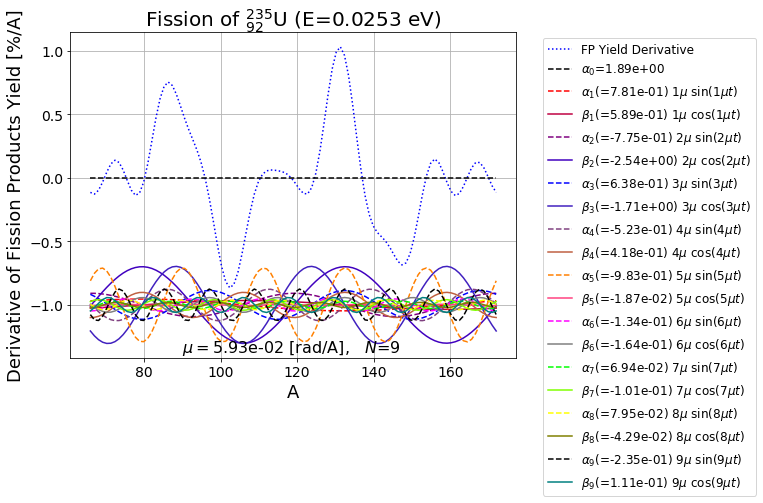

In [19]:
'''Plot the FP Yield Derivative'''

plot_fp_yield_prime(np.array(ifpy_df['A']), mu, x_vec)

Build the second derivative of the Fourier expansion (needed by Newton's method later)

\begin{equation*}
y''(A) = \sum\limits_{k=0}^N -\alpha_k\,k^2\,\mu^2\,\cos(k\,\mu\,A) - \beta_k\,k^2\,\mu^2\,\sin(k\,\mu\,A)
\end{equation*}

In [20]:
def build_fourier_matrix_double_prime( mu, n_pairs, abscissa_vec ):

    import numpy as np
    a_mtrx = np.zeros((abscissa_vec.size, 2*n_pairs + 1))

    for k in range(n_pairs+1):
        if k == 0:
            continue
        a_mtrx[:,2*k-1] = - k*k * mu*mu * np.cos(k * mu * abscissa_vec)
        a_mtrx[:,2*k]   = - k*k * mu*mu * np.sin(k * mu * abscissa_vec)

    return a_mtrx  

In [21]:
def fp_yield_double_prime( mass_number ):
    '''
    Fission product yields curve fitting.

    Parameters
    ----------
    mass_number: float or numpy.ndarray, required
        Nuclide mass number. If `mass_number` is an array, 
        the return value is also an array of values.
    x_a_0: float, required
        Mole fraction of species A.
    
    Returns
    -------
    value: float or numpy.ndarray
        Value or vector of values of the fission product yield
        evaluated at `mass_number`.

    Examples
    --------
    '''   
    #assert np.min(mass_number) >= min(df['A']) and np.max(mass_number) <= max(df['A']),\
    #   'Out of range. Min = %r, max = %r, request_min = %r, request_max = %r'%\
    #   (min(df['A']), max(df['A']), np.min(mass_number), np.max(mass_number) )
    
    if np.min(mass_number) < min(ifpy_df['A']) or np.max(mass_number) > max(ifpy_df['A']):
        return False
    
    a_mtrx = build_fourier_matrix_double_prime(mu, n_pairs, mass_number )
    fp_yield_double_prime = a_mtrx @ x_vec
        
    return fp_yield_double_prime

In [22]:
'''Usage of second derivative of the FP yield function'''

def example(function):
    np.set_printoptions(precision=5)
    # single value A
    print('y"(80) = ',fp_yield_double_prime(np.array([80],np.float64)))

    # multiple values of A at once
    a_values = np.array([80,90,100,110,120,130,140,150,160],np.float64)
    y_double_prime_values = fp_yield_double_prime(a_values)

    for y in y_double_prime_values:
        i = list(y_double_prime_values).index(y)
        print('y"[%2i] = %+5.3e'%(a_values[i],y))
        
example(fp_yield_double_prime)

y"(80) =  [0.11437]
y"[80] = +1.144e-01
y"[90] = -9.036e-02
y"[100] = -1.478e-01
y"[110] = +6.861e-02
y"[120] = -4.401e-02
y"[130] = +1.033e-01
y"[140] = -5.983e-02
y"[150] = +1.172e-01
y"[160] = -5.779e-02


Given $y'(\cdot)$, find the roots

\begin{equation*}
y'(A) = 0 ,
\end{equation*}

using an iterative method based on the initial guess $x_0$. Compute the updates

\begin{equation*}
\delta A_k = - \frac{y'(A_{k-1})}{y''(A_{k-1})} \ \qquad \  \forall \ \qquad \ k = 1,\ldots,k_\text{max} , 
\end{equation*}

then compute the approximation to the root

\begin{equation*}
 A_k = A_{k-1} + \delta A_k \ \qquad \  \forall \ \qquad\ \ k = 1,\ldots,k_\text{max} ,
\end{equation*}

until convergence, say, $\abs{y'_k} \le 10^{-8}$ and $\abs{y'(A_k)} \le 10^{-8}$, or no convergence achieved , say $k>k_\text{max}$. 

In [23]:
"""Newton's method for finding the roots of the function f(.)"""

def newton_solver( function,
                  function_prime,
                  root_0=np.zeros(1),
                  k_max=30, tolerance=1.0e-10, verbose=True ):

    # Other initialization
    delta_k = np.array([1e+10])
    f_k     = np.array([1e+10])
    root = root_0

    if verbose is True:
        print('\n')
        print('******************************************************')
        print("          Newton's Method Iterations                  ")
        print('******************************************************')
        print("k |  f(x_k)  |  f'(x_k) | |del x_k| |    x_k   |convg|")
        print('------------------------------------------------------')

    import math
    k = 0
    
    while (abs(delta_k) > tolerance or abs(f_k) > tolerance) and k <= k_max:
        
        f_k_old   = f_k
        f_k       = function( root )
        if f_k is False:
            return False
        f_prime_k = function_prime( root )
        if f_prime_k is False:
            return False
        
        delta_k_old = delta_k
        delta_k = -f_k / f_prime_k
        
        if abs(f_k[0]) > abs(f_k_old[0]): delta_k *= 0.1
        
        root += delta_k
        
        if k > 0:
            if delta_k[0] != 0.0 and delta_k_old[0] != 0.0:
                convergence_factor = abs(math.log(abs(delta_k[0]),10) / math.log(abs(delta_k_old[0]),10))
            else:
                convergence_factor = 0.0  
        else:
            convergence_factor = 0.0
            
        k = k + 1
        
        if verbose is True:
            print('%2i %+5.3e %+5.3e %+5.3e  %+5.3e %5.2f'%\
                  (k,f_k[0],f_prime_k[0],abs(delta_k[0]),root[0],convergence_factor))
    
    if k > k_max:
        return False
    
    if verbose is True:
        print('******************************************************') 
        print('Root = %8.5e'%root[0])
    
    return root[0]

In [24]:
'''Find "all" local max/min of y(A), that is y'(A) = 0'''

# Scan the range of A's

n_scan_pts = 5
mass_number_scan = np.linspace(min(ifpy_df['A']),max(ifpy_df['A']),n_scan_pts)

k_max = 50         # max # Newton's method iterations
tolerance = 1.0e-8 # Newton's method convergence

max_min = list() # space to hold all root point found

# loop over range of A's and attempt to find a root of the y'(A) function.
# this requires the second derivative y"(A)
for a in mass_number_scan:
    mass_num_0 = np.array([a],np.float64)

    mass_num = newton_solver( fp_yield_prime, fp_yield_double_prime,
                             mass_num_0, 
                             k_max, tolerance, verbose=False )
    if mass_num is False:
        continue
    else:
        #print('')
        #print('Root')
        #print('A = %5.3e\n'%mass_num)
        max_min.append(int(round(mass_num,0)))
        
max_min = sorted(list(set(max_min)))
print('Min/max mass numbers:\n',max_min)

Min/max mass numbers:
 [96, 118, 137, 170]


In [25]:
'''Select only the local max'''

max_yields = list()
for mm in max_min:
    if fp_yield_double_prime(np.array([mm])) < 0:
        max_yields.append( mm )
        
print('Max mass numbers:\n',max_yields)        

Max mass numbers:
 [96, 118, 137, 170]


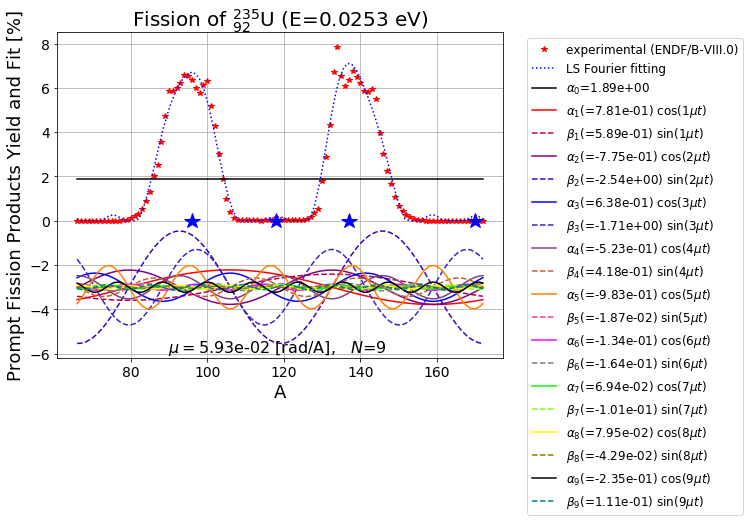

In [26]:
'''Plot the maximum points found'''

plot_fourier_fit(np.array(ifpy_df['A']), np.array(ifpy_df['FP Yield']), mu, x_vec, max_yields )

Results for light and heavy peaks of FP yield

|**Nuclide (neutron energy)**  |**Peak $A_L$**|**Peak $A_H$**|
|:------------|:---------------:|:---------------:|
| $^{235}_{92}$U (E=0.0253 eV) |  96             |  137            |


Integral of the fission product yield curve can be obtained in two ways:
+ Simple sum because of the way the data was normalized to begin with.
+ Integral of $y(A)$.

In [27]:
'''Total sum of independent FP yield per 100 fissions'''
print('Total sum = ',round(sum(ifpy_df['FP Yield']),1))

Total sum =  200.0


Use the [SciPy](https://www.scipy.org/) python library for computing the function integral 

\begin{equation*}
\int\limits_{A_\text{min}}^{A_\text{max}} y(A)\,dA = 200\, \% , 
\end{equation*}

In [28]:
'''Integral of the independent FP yield function: total number of fragments per 100 fissions'''

import scipy.integrate as integrate
# quad returns a pair (integral,accuracy)
min_A = min(ifpy_df['A'])
max_A = max(ifpy_df['A'])

integral = integrate.quad( lambda A: fp_yield(np.array([A])), min_A, max_A, limit=150 )
integral_error = integral[1]
assert abs(integral_error) <= 1e-5
print('integral = ',round(integral[0],1))

integral =  204.3


Note that each FP yield peak is assigned 100 % normalization

\begin{equation*}
\int\limits_{A_\text{min}}^{\overline{A}} y_\text{L}(A)\,dA = 100\, \% \ \quad \  \text{and} 
\int\limits_{\overline{A}}^{A_\text{min}} y_\text{H}(A)\,dA = 100\, \% 
\end{equation*}


In [29]:
'''Integral of the light FP yield function'''

import scipy.integrate as integrate
# quad returns a pair (integral,accuracy)
min_A = min(ifpy_df['A'])
mid_A = int(round((max(ifpy_df['A'])+min_A)/2.0,0))

integral = integrate.quad( lambda A: fp_yield(np.array([A])), min_A, mid_A, limit=150 )
integral_error = integral[1]
assert abs(integral_error) <= 1e-5
print('min A    = ',min_A)
print('mid A    = ',mid_A)
print('integral = ',round(integral[0],1))

min A    =  66
mid A    =  119
integral =  101.8


In [30]:
'''Integral of the heavy FP yield function'''

import scipy.integrate as integrate
# quad returns a pair (integral,accuracy)
mid_A = int(round((max(ifpy_df['A'])+min_A)/2,0))

integral = integrate.quad( lambda A: fp_yield(np.array([A])), mid_A, max_A, limit=150 )
integral_error = integral[1]
assert abs(integral_error) <= 1e-5
print('mid A    = ',mid_A)
print('max A    = ',max_A)
print('integral = ',round(integral[0],1))

mid A    =  119
max A    =  172
integral =  102.5


## Independent fission fragment yield (A,Z)<a id="iffyaz"></a>

Acquiring the data:

+ Using the [ENDF](https://www.nndc.bnl.gov/exfor/endf00.jsp) help tab, look for an existing example. In this case follow the `Example 9: 235U, individual and cumulative fission product yields, US library, numerical values`. 
+ Use the *extended retrieval tab* and provide the input: `Target=u-235, Sub-library (Projectile) = *fpy* and Library=ENDF/B-VII.0`. 
+ In the new window, select the library and click on `FPY(A)`. 
+ Select the *independent* (prompt) thermal neutron fission product yield data `FPYI,U-235,ENDF/B-VIII.0,Ei=0.0253eV` and `Repaint` the plot.
+ Click on `FY(Z,A) matrix  is [here]` at the bottom of the window.
+ Reset the energy level for plotting and `Repaint` the plot.
+ Use the browser save option to create a file with the raw data `u-235-ifpy-AZ-thermal.dat`.
+ Unfortunately this data file needs to be edited before it can be imported.

In [31]:
'''View the raw data'''
!head -n 8 data/u-235-ifpy-AZ-thermal.dat
print('...')
!tail -n 1 data/u-235-ifpy-AZ-thermal.dat

#ZVView-data-copy: 17-Feb-2019 14:33:11
------------------------------------------------------------------------
#
#FPYI,U-235,ENDF/B-VIII.0,Ei=0.0253eV
Z(107x50): Z_i,j = Cor(?_Xi ,?_Yj )*100
  	X(NO-DIM)
Y(NO-DIM) 	66	67	68	69	70	71	72	73	74	75	76	77	78	79	80	81	82 83	84	85	86	87	88	89	90	91	92	93	94	95	96	97	98	99	100	101	102	103 104	105	106	107	108	109	110	111	112	113	114	115	116	117	118	119	120 121	122	123	124	125	126	127	128	129	130	131	132	133	134	135	136	137 138	139	140	141	142	143	144	145	146	147	148	149	150	151	152	153	154 155	156	157	158	159	160	161	162	163	164	165	166	167	168	169	170	171	172	/j/
23 2.05032e-17	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0 0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0 0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1
...
72 	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0 0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0 

In [32]:
'''Function to read the blank-spaced column data into a Pandas data frame (table)'''

def read_table(file_name):
    '''
    Read table data into a `pandas` data frame (table).  
    
    Parameters
    ----------
    file_name: str, required
        File name and its path relative to this notebook.
    
    Returns
    -------
    df: pandas.df
        `Pandas` data frame (table).

    Examples
    --------
    '''
    import pandas as pd
    
    df = pd.read_csv( file_name,  
                      skiprows=6,
                      delim_whitespace=True)
    
# to avoid frustrations, set explicitly the data types of each column
    for c in df.columns: 
        if c == 'Y(NO-DIM)':
            continue
        df = df.astype({c:float},copy=False)

    #print(df.dtypes)
    return df

In [33]:
'''Read data'''

ifpy_az_df = read_table('data/u-235-ifpy-AZ-thermal.dat')

In [34]:
'''Function for creating a FP yield(A,Z) list container'''

def get_fpy_az( df ):
    '''
    Create a list of named tuple nuclides
    Parameters
    ----------
    df: pandas data frame, required
        Table of data for nuclides.
    
    Returns
    -------
    nuclides: list(namedtuple)
        List of namedtuples. Names: name, element_name, Z, A, yield_percent.

    Examples
    --------
    '''
    
    nuclides = list()

    # design a container data structure
    from collections import namedtuple
    FPY = namedtuple('FPY', ['name','element_name','Z','A','yield_percent'])

    import pandas as pd

    # Use the Mendeleev python package (periodic table of elements)
    from mendeleev import element

    total_yield = 0.0 # sum total yield
    for row in df.itertuples(index=False): # loop over rows of a pandas dataframe
        z = row[0]
        for j in range(1,len(row)-1):
            if row[j] < 1.e-10: # this will eliminate lots of zeros (a must to have)
                continue
            a_str = df.columns[j] # index column is not part of the columns
            symbol = element(z).symbol
            name = name=symbol+'-'+a_str
            element_name = element(z).name
            yield_value = row[j]
            total_yield += yield_value
            nuc = FPY( name=name, element_name=element_name, Z=z, A=int(a_str), yield_percent=yield_value )
        
            nuclides.append(nuc)
    
    print('Sum of yield values in data file = ',round(total_yield,2))
    return nuclides

In [35]:
'''Create the FP yield(A,Z) list container'''

ifpy_az = get_fpy_az( ifpy_az_df )
print('Sum of yield values in dictionary container = ',round(sum([fp.yield_percent for fp in ifpy_az]),2))
print('# of FP nuclides = ', len(ifpy_az))

Sum of yield values in data file =  200.0
Sum of yield values in dictionary container =  200.0
# of FP nuclides =  740


In [36]:
'''Function to plot a 3-D surface plot or a 2D surface plot'''
# to do

'Function to plot a 3-D surface plot or a 2D surface plot'

In [37]:
'''Plot FP yield on the A,Z plane'''
# to do

'Plot FP yield on the A,Z plane'

In [38]:
'''Total sum of independent FP yield per 100 fissions'''

print('Total sum = ',round(sum([fpy.yield_percent for fpy in ifpy_az]),1))

Total sum =  200.0


In [39]:
'''Plot function for nuclides half-life'''

def plot_nuclides(fpy):
    
    from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
    (fig, ax) = plt.subplots(figsize=(18,7))

    ax.plot(range(len(fpy)), [nc.yield_percent for nc in fpy], 
            '-.',color='black', marker='o',markersize=10)
    
    plt.xticks(range(len(fpy)),[nc.name for nc in fpy],rotation=70,fontsize=12)

    ax.set_xlim((-1,len(fpy)))

    plt.xlabel(r'Nuclide',fontsize=18)
    plt.ylabel(r'Yield [%]',fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=16)
    
    plt.title('Independent (Prompt) Fission Products (>1% Yield)',fontsize=22)
    ax.grid(True)
    #plt.yscale('log')
    plt.show()

    return

# of FP nuclides =  67
Sum =  163.2


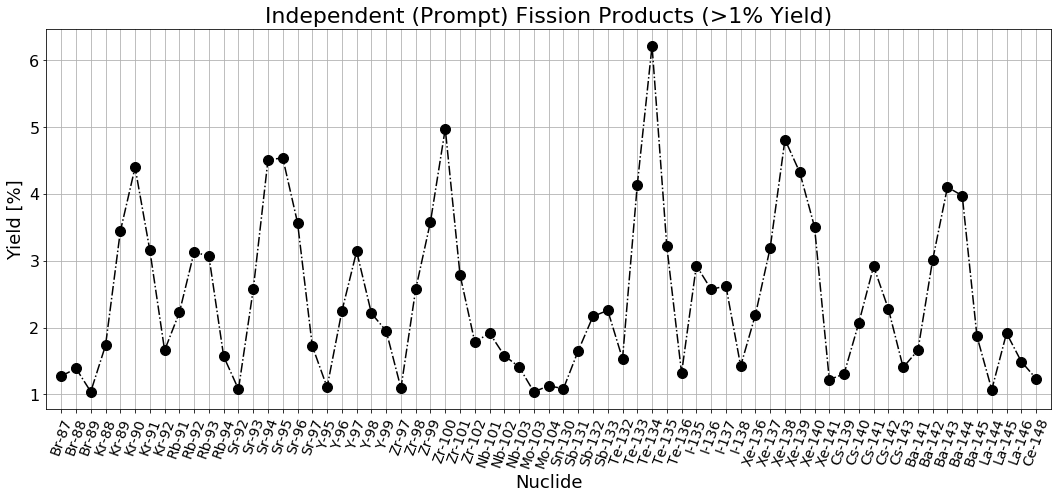

In [41]:
'''Plot FP nuclides with 1% or more fission yield'''

fp_list = list()
for fp in ifpy_az:
    if fp.yield_percent >= 1.0:
        fp_list.append(fp)
        
print('# of FP nuclides = ', len(fp_list))
print('Sum = ',round(sum([fpy.yield_percent for fpy in fp_list]),1))

plot_nuclides(fp_list)

In [42]:
'''Where is Mo-99?'''

for fp in ifpy_az:
    if fp.name == 'Mo-99':
        print('Mo-99 yield [%] = ',fp.yield_percent)

Mo-99 yield [%] =  0.042814
